# Capstone: International Airline Reports Data Analysis

## Reading Data and Imports

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os as os
import sys as sys
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

In [6]:
#if csv/if excel/if sql/ allow for reading different types of files
def read (filename, filetype):
    if filetype == '.csv':
        df = pd.read_csv(filename)
    elif filetype == '.xslx':
        df = pd.read_excel(filename)
    elif filetype == '.sql':
        #df = pd.read_sql(sql, con, index_col=None) ##get the right libraries
        print('Please use sql engine and connect to sql database')
    return df

In [7]:
def listfiles (directory, extension):
    # user can input any directory here as well
    # if the user wants another file added, just add it to this directory and rerun the code
    filenames = []
    for file in os.listdir():
        if file.endswith(extension):
            filenames.append(file)
        else:
            continue
    return filenames

In [8]:
# list directory
directory = 'EDA-airlines-project'
extension = ('.csv', '.xslx', '.sql')
filenames = listfiles(directory, extension)

In [9]:
filenames

['International_Report_Departures.csv', 'International_Report_Passengers.csv']

In [10]:
readfiles = []
renames = []
for i in range(len(filenames)):
    print('File to be read:', filenames[i],'\n')
    index = os.path.splitext(filenames[i])  ##returns tuple
    file_name = index[0]
    renames.append(file_name)
    readfiles.append(file_name)
    print('File name:', file_name,'\n')
    file_ext = index[1]
    print('File extension:', file_ext,'\n')
    readfiles[i] = read(filenames[i], file_ext)

File to be read: International_Report_Departures.csv 

File name: International_Report_Departures 

File extension: .csv 



File to be read: International_Report_Passengers.csv 

File name: International_Report_Passengers 

File extension: .csv 



In [11]:
dfcount = len(readfiles)
dfcount

2

## Data Understanding

In [12]:
# general EDA so use readfiles list of dataframes
readfiles[dfcount-dfcount].head()   ## first df is 0

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,05/01/2006,2006,5,12016,GUM,5,13162,MAJ,844,20177,PFQ,1,Departures,0,10,10
1,05/01/2003,2003,5,10299,ANC,1,13856,OKO,736,20007,5Y,1,Departures,0,15,15
2,03/01/2007,2007,3,10721,BOS,13,12651,KEF,439,20402,GL,1,Departures,0,1,1
3,12/01/2004,2004,12,11259,DAL,74,16271,YYZ,936,20201,AMQ,1,Departures,0,1,1
4,05/01/2009,2009,5,13303,MIA,33,11075,CMW,219,21323,5L,0,Departures,0,20,20


In [13]:
readfiles[dfcount-1].head()  ## last df is dfcount -1

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,05/01/2014,2014,5,14492,RDU,36,11032,CUN,148,19534,AM,0,Passengers,0,315,315
1,06/01/2007,2007,6,13204,MCO,33,16085,YHZ,951,20364,C6,0,Passengers,0,683,683
2,12/01/2005,2005,12,11433,DTW,43,10411,AUA,277,20344,RD,1,Passengers,0,1010,1010
3,04/01/2003,2003,4,13487,MSP,63,16304,ZIH,148,20204,MG,1,Passengers,0,508,508
4,12/01/2005,2005,12,12016,GUM,5,11138,CRK,766,20312,TZ,1,Passengers,0,76,76


In [14]:
# shape
print(type(readfiles))
print(type(readfiles[0])) # check each list element is a dataframe
df0shape = readfiles[0].shape
df_1shape = readfiles[dfcount - 1].shape 
print('shape of first df:', df0shape)  # first df
print('shape of first df:', df_1shape) # last df

<class 'list'>
<class 'pandas.core.frame.DataFrame'>
shape of first df: (930808, 16)
shape of first df: (680985, 16)


In [15]:
readfiles[0].head(2)

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,05/01/2006,2006,5,12016,GUM,5,13162,MAJ,844,20177,PFQ,1,Departures,0,10,10
1,05/01/2003,2003,5,10299,ANC,1,13856,OKO,736,20007,5Y,1,Departures,0,15,15


In [16]:
readfiles[dfcount - 1].head(2)

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,05/01/2014,2014,5,14492,RDU,36,11032,CUN,148,19534,AM,0,Passengers,0,315,315
1,06/01/2007,2007,6,13204,MCO,33,16085,YHZ,951,20364,C6,0,Passengers,0,683,683


In [17]:
# columns of first element, readfiles[0]
df0columns = readfiles[0].columns
df_1columns = readfiles[dfcount - 1].columns
print('columns of first df:________________\n', df0columns)
print('columns of last df:________________\n', df_1columns)

columns of first df:________________
 Index(['data_dte', 'Year', 'Month', 'usg_apt_id', 'usg_apt', 'usg_wac',
       'fg_apt_id', 'fg_apt', 'fg_wac', 'airlineid', 'carrier', 'carriergroup',
       'type', 'Scheduled', 'Charter', 'Total'],
      dtype='object')
columns of last df:________________
 Index(['data_dte', 'Year', 'Month', 'usg_apt_id', 'usg_apt', 'usg_wac',
       'fg_apt_id', 'fg_apt', 'fg_wac', 'airlineid', 'carrier', 'carriergroup',
       'type', 'Scheduled', 'Charter', 'Total'],
      dtype='object')


In [18]:
df0dtypes = readfiles[0].dtypes 
df_1dtypes = readfiles[dfcount - 1].dtypes
print('dtypes of columns of first df:______________\n', df0dtypes)

dtypes of columns of first df:______________
 data_dte        object
Year             int64
Month            int64
usg_apt_id       int64
usg_apt         object
usg_wac          int64
fg_apt_id        int64
fg_apt          object
fg_wac           int64
airlineid        int64
carrier         object
carriergroup     int64
type            object
Scheduled        int64
Charter          int64
Total            int64
dtype: object


In [19]:
print('dtypes of columns of last df:______________\n', df_1dtypes)

dtypes of columns of last df:______________
 data_dte        object
Year             int64
Month            int64
usg_apt_id       int64
usg_apt         object
usg_wac          int64
fg_apt_id        int64
fg_apt          object
fg_wac           int64
airlineid        int64
carrier         object
carriergroup     int64
type            object
Scheduled        int64
Charter          int64
Total            int64
dtype: object


In [20]:
readfiles[0].describe()

,Year,Month,usg_apt_id,usg_wac,fg_apt_id,fg_wac,airlineid,carriergroup,Scheduled,Charter,Total
count,930808.000000,930808.000000,930808.000000,930808.000000,930808.000000,930808.000000,930808.000000,930808.000000,930808.000000,930808.000000,930808.000000
mean,2006.021361,6.414783,12809.473781,42.511740,13484.676238,466.910479,20057.217505,0.599361,40.003181,2.005483,42.008665
std,8.558831,3.471070,2716.223845,27.571338,1932.601107,288.005971,479.071456,0.490028,60.948973,8.278403,60.340835
min,1990.000000,1.000000,10010.000000,1.000000,10119.000000,106.000000,19386.000000,0.000000,0.000000,0.000000,1.000000
25%,1999.000000,3.000000,11618.000000,22.000000,11868.000000,205.000000,19704.000000,0.000000,0.000000,0.000000,3.000000
50%,2007.000000,6.000000,12892.000000,33.000000,13408.000000,427.000000,19991.000000,1.000000,17.000000,0.000000,20.000000
75%,2014.000000,9.000000,13487.000000,72.000000,15084.000000,736.000000,20312.000000,1.000000,60.000000,1.000000,60.000000
max,2020.000000,12.000000,99999.000000,93.000000,16881.000000,975.000000,22067.000000,1.000000,2019.000000,1092.000000,2019.000000


In [21]:
readfiles[dfcount - 1].describe()

,Year,Month,usg_apt_id,usg_wac,fg_apt_id,fg_wac,airlineid,carriergroup,Scheduled,Charter,Total
count,680985.000000,680985.000000,680985.000000,680985.000000,680985.000000,680985.000000,680985.000000,680985.000000,680985.000000,680985.000000,680985.000000
mean,2006.141110,6.366576,12779.103825,44.394527,13493.331869,468.122264,20031.610461,0.562233,6478.893801,196.740288,6675.634089
std,8.716122,3.466745,2510.939346,28.110753,1955.917890,292.799407,510.270976,0.496112,8622.704655,954.759814,8532.400269
min,1990.000000,1.000000,10010.000000,1.000000,10125.000000,106.000000,19386.000000,0.000000,0.000000,0.000000,1.000000
25%,1999.000000,3.000000,11618.000000,22.000000,11760.000000,204.000000,19623.000000,0.000000,142.000000,0.000000,633.000000
50%,2007.000000,6.000000,12889.000000,33.000000,13408.000000,429.000000,19917.000000,1.000000,3561.000000,0.000000,3803.000000
75%,2014.000000,9.000000,13796.000000,74.000000,15092.000000,736.000000,20312.000000,1.000000,9700.000000,0.000000,9761.000000
max,2020.000000,12.000000,99999.000000,93.000000,16881.000000,975.000000,22067.000000,1.000000,149898.000000,58284.000000,150195.000000


In [22]:
#readfiles[dfcount - 1].pivot_table(values = 'Charter', index = 'Year', aggfunc = np.mean)

### Data Preparation

In [23]:
readfiles[0].head(2)

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,05/01/2006,2006,5,12016,GUM,5,13162,MAJ,844,20177,PFQ,1,Departures,0,10,10
1,05/01/2003,2003,5,10299,ANC,1,13856,OKO,736,20007,5Y,1,Departures,0,15,15


In [24]:
readfiles[dfcount-1].head(2)

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,05/01/2014,2014,5,14492,RDU,36,11032,CUN,148,19534,AM,0,Passengers,0,315,315
1,06/01/2007,2007,6,13204,MCO,33,16085,YHZ,951,20364,C6,0,Passengers,0,683,683


In [25]:
# identify repetitive column name between first and last df
if len(df0columns) > len(df_1columns):
    columnseries = len(df0columns)
else:
    columnseries = len(df_1columns)

repetitivecols = []
for col in range(columnseries):
    if df0columns[col] == df_1columns[col]:
        repetitivecols.append(df0columns[col])
        #print('Repetitive column is:\n', df0columns[col])
    else:
        print('Column ', df0columns[col], 'is not repetitive')

if len(repetitivecols) == 0:
    print('Columns of each df are unique')
elif len(repetitivecols) == columnseries:
    print('All columns are repeated between dfs')# then ask user if he wants to merge the dfs after nulls of each have been filled
else:
    print('The number of repeated columns is: ', len(repetitivecols))

repetitivecols

All columns are repeated between dfs


['data_dte',
 'Year',
 'Month',
 'usg_apt_id',
 'usg_apt',
 'usg_wac',
 'fg_apt_id',
 'fg_apt',
 'fg_wac',
 'airlineid',
 'carrier',
 'carriergroup',
 'type',
 'Scheduled',
 'Charter',
 'Total']

In [26]:
#check duplicated rows
def checkduplicates(Dataframe):
    duplicates = Dataframe.duplicated().tolist()
    if 'True' in duplicates:
        print('Duplicates found')
        indices = duplicates.index('True')
    else:
        print('No duplicates found')
        indices = 0
    return indices

In [50]:
#return 2 lists, Numerical columns and Categorical columns
def types(Dataframe):
    numerical = Dataframe.select_dtypes(exclude = ['object']).columns.tolist()
    categorical = Dataframe.select_dtypes(include = ['object']).columns.tolist()
    return numerical, categorical

In [65]:
#allow user to search through df
def searchdf(Dataframe):
    print(Dataframe.columns)
    usersearch = input('Would you like search for a row value? Y/y or N/n?')
    while usersearch == 'Y' or usersearch == 'y':
        query = str(input('What feature are you searching for? '))
        if query in Dataframe.columns :
            print('feature is found')
        else:
            print('feature cannot be found , break')
            break

        #c, n = types(Dataframe)
        #if query in c: 
        value = str(input('the new value: '))
        #else:
            #value = int(input('the new value: '))
        if value == Dataframe[query].unique :
            print('feature is common, will be output')
        else:
            print('feature is not common, break')
            break
        string = str(query) + "==" + str(value)
        print(readfiles[0].query(string))
        usersearch = input('Repeat? ')

In [29]:
#renaming columns
#user can rename columns in dataframe  
def rename(Dataframe):
    numerical, categorical = types(Dataframe)
    renamenumerical = input('Would you like to rename the numerical type columns, Y/y or N/n ?\n')
    if renamenumerical == 'Y' or renamenumerical == 'y':
        repeat = 'y'
        print('These are the numerical columns:\n', numerical)
        while repeat == 'y' or repeat == 'Y':
            column = input('Write the column here:\n ')
            newname = input('Write the new name here:\n ')
            if column in numerical:
                Dataframe = Dataframe.rename(columns = {column : newname})
                print('Successfully renamed')
                flag = 1
            else:
                flag = 0  ##unsuccessful renaming, try again
                print('Unsuccessfully renamed')
                
            repeat = input('Repeat?')
    renamecategorical = input('Would you like to rename the categorical type columns, Y/y or N/n ?\n')
    if renamecategorical == 'Y' or renamecategorical == 'y':
        repeat = 'y'
        print('These are the categorical columns:\n', categorical)
        while repeat == 'y' or repeat == 'Y':
            column = input('Write the column here:\n ')
            newname = input('Write the new name here:\n ')
            if column in categorical:
                Dataframe = Dataframe.rename(columns = {column : newname})
                print('Successfully renamed')
                flag = 1
            else:
                flag = 0  ##unsuccessful renaming, try again
                print('Unsuccessfully renamed')
                
            repeat = input('Repeat?')
    return Dataframe.copy() 

In [30]:
checkduplicates(readfiles[0])##rows only

No duplicates found


0

In [31]:
def duplicatecols(Dataframe):
    duplicatecols = Dataframe.columns[Dataframe.columns.duplicated()]
    if duplicatecols.empty:
        print('There are no duplicated cols in this dataframe')
        df = Dataframe##don't drop duplicates
    else:
        print(duplicatecols)
        df = Dataframe.drop(columns = duplicatecols, inplace = True)##drop duplicates
    return duplicatecols, df

In [32]:
def duplicaterows(Dataframe):
    duplicaterows = Dataframe[Dataframe.duplicated()]
    if duplicaterows.empty:
        print('No duplicated rows found')
        df = Dataframe##don't drop duplicates
    else:
        print(duplicaterows)##drop duplicates
        df = Dataframe.drop_duplicates(keep = 'last', inplace = True)
    return duplicaterows, df

In [33]:
duplicaterows0, readfiles[0] = duplicaterows(readfiles[0])

No duplicated rows found


In [34]:
duplicatecols0, readfiles[0] = duplicatecols(readfiles[0])

There are no duplicated cols in this dataframe


In [35]:
checkduplicates(readfiles[dfcount - 1])

No duplicates found


0

In [36]:
duplicaterows_1, readfiles[dfcount -1] = duplicaterows(readfiles[dfcount-1])

No duplicated rows found


In [37]:
duplicatecols_1, readfiles[dfcount -1] = duplicatecols(readfiles[dfcount-1])

There are no duplicated cols in this dataframe


In [38]:
#rename columns
df0renamed = rename(readfiles[0]) 

These are the numerical columns:
 ['Year', 'Month', 'usg_apt_id', 'usg_wac', 'fg_apt_id', 'fg_wac', 'airlineid', 'carriergroup', 'Scheduled', 'Charter', 'Total']
Successfully renamed
These are the categorical columns:
 ['data_dte', 'usg_apt', 'fg_apt', 'carrier', 'type']
Successfully renamed


In [39]:
df0renamed.head(2)

,data_dte,Year,Month,UsageID,usg_apt,usg_wac,fg_apt_id,FGApt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,05/01/2006,2006,5,12016,GUM,5,13162,MAJ,844,20177,PFQ,1,Departures,0,10,10
1,05/01/2003,2003,5,10299,ANC,1,13856,OKO,736,20007,5Y,1,Departures,0,15,15


In [40]:
df_1renamed = rename(readfiles[dfcount-1])

In [41]:
df_1renamed.head(2)

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,05/01/2014,2014,5,14492,RDU,36,11032,CUN,148,19534,AM,0,Passengers,0,315,315
1,06/01/2007,2007,6,13204,MCO,33,16085,YHZ,951,20364,C6,0,Passengers,0,683,683


In [42]:
def nullvalues(Dataframe, dfcolumns):
    #identify column index with nulls and remove them
    nullindices =[]
    for col in range(len(dfcolumns)):
        if (Dataframe[dfcolumns[col]].isna().sum()) == 0:
            print('Column : ',dfcolumns[col], 'has no null values')
            df = Dataframe
        else:
            nullindices.append(col)
            print('___________________')
            print('Column : ',dfcolumns[col], 'has null values\n')
            print('___________________')
            value = input('Now, you should fill this column in a value of your choice: ')
            df = Dataframe.fillna(value, inplace = True)
    return nullindices, df

In [43]:
nullindices0, df0renamed = nullvalues(readfiles[0], df0columns)

Column :  data_dte has no null values
Column :  Year has no null values
Column :  Month has no null values
Column :  usg_apt_id has no null values
Column :  usg_apt has no null values
Column :  usg_wac has no null values
Column :  fg_apt_id has no null values
Column :  fg_apt has no null values
Column :  fg_wac has no null values
Column :  airlineid has no null values
___________________
Column :  carrier has null values

___________________
Column :  carriergroup has no null values
Column :  type has no null values
Column :  Scheduled has no null values
Column :  Charter has no null values
Column :  Total has no null values


In [44]:
for x in range(len(nullindices0)):
    print(df0renamed[pd.isnull(df0renamed[df0columns[x]])])##check null values have been filled

Empty DataFrame
Columns: [data_dte, Year, Month, usg_apt_id, usg_apt, usg_wac, fg_apt_id, fg_apt, fg_wac, airlineid, carrier, carriergroup, type, Scheduled, Charter, Total]
Index: []


In [64]:
searchdf(df0renamed)  ##search through common values

Index(['data_dte', 'Year', 'Month', 'usg_apt_id', 'usg_apt', 'usg_wac',
       'fg_apt_id', 'fg_apt', 'fg_wac', 'airlineid', 'carrier', 'carriergroup',
       'type', 'Scheduled', 'Charter', 'Total'],
      dtype='object')
feature is found
Empty DataFrame
Columns: [data_dte, Year, Month, usg_apt_id, usg_apt, usg_wac, fg_apt_id, fg_apt, fg_wac, airlineid, carrier, carriergroup, type, Scheduled, Charter, Total]
Index: []
feature is found
          data_dte  Year  Month  usg_apt_id usg_apt  usg_wac  fg_apt_id  \
13      08/01/2009  2009      8       13061     LRD       74      14886   
38      08/01/2003  2003      8       11423     DSM       61      12239   
45      08/01/2006  2006      8       14761     SFB       33      12990   
68      08/01/2005  2005      8       13244     MEM       54      16078   
70      08/01/2001  2001      8       11697     FLL       33      13952   
...            ...   ...    ...         ...     ...      ...        ...   
930774  08/01/2000  2000      8    

In [47]:
nullindices_1, df_1renamed = nullvalues(readfiles[dfcount-1], df_1columns)

Column :  data_dte has no null values
Column :  Year has no null values
Column :  Month has no null values
Column :  usg_apt_id has no null values
Column :  usg_apt has no null values
Column :  usg_wac has no null values
Column :  fg_apt_id has no null values
Column :  fg_apt has no null values
Column :  fg_wac has no null values
Column :  airlineid has no null values
___________________
Column :  carrier has null values

___________________
Column :  carriergroup has no null values
Column :  type has no null values
Column :  Scheduled has no null values
Column :  Charter has no null values
Column :  Total has no null values


In [62]:
#df_1renamed[df_1renamed['carrier'] == 'Default']
for x in range(len(nullindices_1)):
    print(df_1renamed[pd.isnull(df_1renamed[df_1columns[x]])])##check null values have been filled

In [66]:
searchdf(df_1renamed)

Index(['data_dte', 'Year', 'Month', 'usg_apt_id', 'usg_apt', 'usg_wac',
       'fg_apt_id', 'fg_apt', 'fg_wac', 'airlineid', 'carrier', 'carriergroup',
       'type', 'Scheduled', 'Charter', 'Total'],
      dtype='object')
feature is found
feature is not common, break


In [67]:
#remove index column
df0noindex = df0renamed.reset_index(drop = True).copy()
df_1noindex = df_1renamed.reset_index(drop = True).copy()

In [68]:
df0noindex.head(2)

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,05/01/2006,2006,5,12016,GUM,5,13162,MAJ,844,20177,PFQ,1,Departures,0,10,10
1,05/01/2003,2003,5,10299,ANC,1,13856,OKO,736,20007,5Y,1,Departures,0,15,15


## Feature Understanding and Visualisation

In [69]:
#return 2 lists, Numerical columns and Categorical columns
def types(Dataframe):
    pd.DataFrame(Dataframe)
    numerical = Dataframe.select_dtypes(exclude = ['object']).columns.tolist()
    categorical = Dataframe.select_dtypes(include = ['object']).columns.tolist()
    return numerical, categorical

In [70]:
#grouping by numerical and categorical features
df0numerical, df0categorical = types(df0noindex)
df_1numerical, df_1categorical = types(df_1noindex)

In [72]:
#encoding
print('First df categorical: ', df0categorical)
print('Last df categorical:', df_1categorical)

First df categorical:  ['data_dte', 'usg_apt', 'fg_apt', 'carrier', 'type']
Last df categorical: ['data_dte', 'usg_apt', 'fg_apt', 'carrier', 'type']


In [87]:
#dummies to get binary data 
df0binary = []
df_1binary = []
for col in range(len(df0categorical)):
    df0binary.append(pd.get_dummies(df0noindex[df0columns[col]].head(100)))

In [88]:
for col2 in range(len(df_1categorical)):
    df_1binary.append(pd.get_dummies(df_1noindex[df_1columns[col]].head(100)))

In [93]:
#readfiles[dfcount - 1].pivot_table(values = 'Charter', index = 'Year', aggfunc = np.mean)
print('Binary categorical data of first df:\n')
for x in range(len(df0binary)):
    print(df0columns[x], '\n')
    print(df0binary[x].head(5))
    print('_______________________________')

Binary categorical data of first df:

data_dte 

   01/01/2002  01/01/2003  01/01/2004  01/01/2005  01/01/2010  02/01/2001  \
0       False       False       False       False       False       False   
1       False       False       False       False       False       False   
2       False       False       False       False       False       False   
3       False       False       False       False       False       False   
4       False       False       False       False       False       False   

   02/01/2002  02/01/2004  02/01/2005  02/01/2006  02/01/2008  02/01/2010  \
0       False       False       False       False       False       False   
1       False       False       False       False       False       False   
2       False       False       False       False       False       False   
3       False       False       False       False       False       False   
4       False       False       False       False       False       False   

   03/01/2003  03/01/2004

In [94]:
print('Binary categorical data of last df:\n')
for x in range(len(df_1binary)):
    print(df_1columns[x], '\n')
    print(df_1binary[x].head(5))
    print('_______________________________')

Binary categorical data of last df:

data_dte 

     ABQ    AEX    ALB    ANN    ATL    AVP    BDL    BFI    BGR    BNA  \
0  False  False  False  False  False  False  False  False  False  False   
1  False  False  False  False  False  False  False  False  False  False   
2  False  False  False  False  False  False  False  False  False  False   
3  False  False  False  False  False  False  False  False  False  False   
4  False  False  False  False  False  False  False  False  False  False   

     BOS    BUF    BWI    CDB    CLE    CLT    CVG    DEN    DFW    DSM  \
0  False  False  False  False  False  False  False  False  False  False   
1  False  False  False  False  False  False  False  False  False  False   
2  False  False  False  False  False  False  False  False  False  False   
3  False  False  False  False  False  False  False  False  False  False   
4  False  False  False  False  False  False  False  False  False  False   

     DTW    EWR    FQQ    FRG    GSP    GUM    HOP

Suggested features of first df:  Index(['data_dte', 'Year', 'Month', 'usg_apt_id', 'usg_apt', 'usg_wac',
       'fg_apt_id', 'fg_apt', 'fg_wac', 'airlineid', 'carrier', 'carriergroup',
       'type', 'Scheduled', 'Charter', 'Total'],
      dtype='object')


Suggested features of last df:  Index(['data_dte', 'Year', 'Month', 'usg_apt_id', 'usg_apt', 'usg_wac',
       'fg_apt_id', 'fg_apt', 'fg_wac', 'airlineid', 'carrier', 'carriergroup',
       'type', 'Scheduled', 'Charter', 'Total'],
      dtype='object')




Pivot table of first df of values: Charter |index: Year
       Charter
Year          
1990  2.485045
1991  2.571795
1992  2.969327
1993  2.861546
1994  2.759273
1995  2.688394
1996  2.540299
1997  2.556393
1998  2.272396
1999  2.247189
2000  2.233682
2001  1.785093
2002  2.136635
2003  2.770115
2004  2.668927
2005  2.372374
2006  2.062823
2007  1.946494
2008  1.700375
2009  1.477439
2010  1.656712
2011  1.573551
2012  1.522388
2013  1.454280
2014  1.424329
2015  1.454366
2016  1.323615
2017  1.225348
2018  1.360717
2019  2.175076
2020  1.585803
Pivot table of last df of values: Charter |index: Year
         Charter
Year            
1990  362.665937
1991  379.698747
1992  426.475434
1993  412.794043
1994  408.048018
1995  375.906095
1996  328.660883
1997  327.315632
1998  287.306609
1999  337.222842
2000  343.911633
2001  278.706623
2002  271.269475
2003  300.361138
2004  261.662944
2005  220.958505
2006  166.337749
2007  145.015988
2008  100.340426
2009   66.608123
2010   74.585453
201

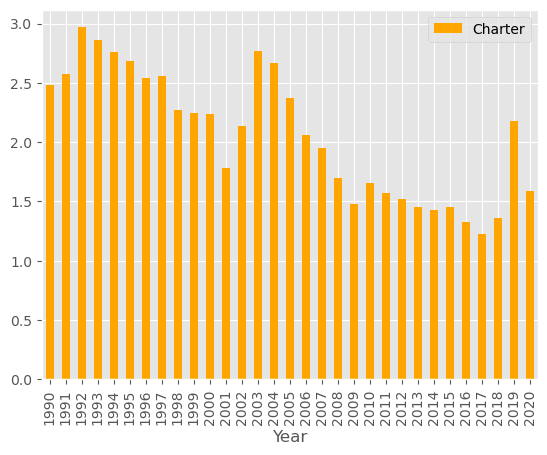

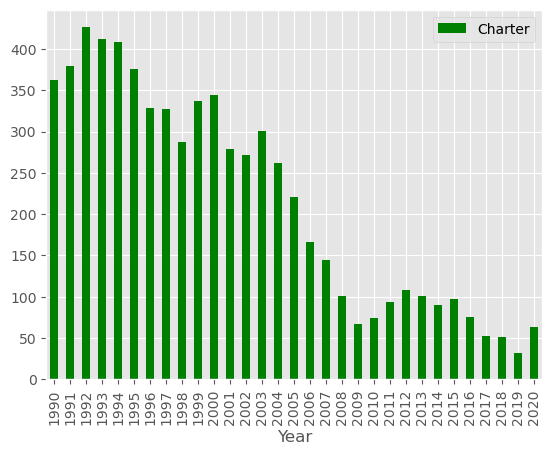

In [98]:
#pivot tables by numerical and categorical features
print('Suggested features of first df: ', df0columns)
print('\n')
print('Suggested features of last df: ', df_1columns)
print('\n')
pivot = input('Should the numerical/categorical data be summarised by mean? Y/y or N/n? ')

while pivot == 'Y' or pivot == 'y':
    values = str(input('What attribute shall be valued? '))
    index = str(input('How should the pivot table be indexed? '))
    dfid = int(input('And in which df? 0/-1?'))
    if (values in df0columns) and (index in df0columns) and (dfid == 0):
        print('Pivot table of first df of values:',values,'|index:',index)
        df0pivotmean = df0noindex.pivot_table(values = values, index = index, aggfunc = np.mean)
        print(df0pivotmean)
        df0pivotmean.plot(kind = 'bar', color = 'orange', fontsize = 10)
    elif (values in df_1columns) and (index in df_1columns) and (dfid == -1):
        print('Pivot table of last df of values:',values,'|index:',index)
        df_1pivotmean = df_1noindex.pivot_table(values = values, index = index, aggfunc = np.mean)
        print(df_1pivotmean)
        df_1pivotmean.plot(kind = 'bar', color = 'green', fontsize = 10)
    else:
        print('Pivot table cannot be constructued')

    repeat = input('Repeat? Y/y or N/n?')
    if repeat == 'N' or repeat == 'n':
        break
        
#readfiles[dfcount - 1].pivot_table(values = 'Charter', index = 'Year', aggfunc = np.mean)

In [99]:
#count values of each column
nonduplicates0 = []
nonduplicates_1 = []
for col in range(len(df0columns)):
    nonduplicates0.append(df0noindex[df0noindex.columns[col]].value_counts())
    nonduplicates_1.append(df_1noindex[df_1noindex.columns[col]].value_counts())

In [100]:
for col in range(len(df0columns)):
    print(nonduplicates0[col].head())
    print('________________________')

data_dte
03/01/2018    3471
06/01/2019    3448
06/01/2018    3440
04/01/2018    3415
07/01/2018    3401
Name: count, dtype: int64
________________________
Year
2018    39926
2017    38993
2019    38589
2016    37282
2015    35544
Name: count, dtype: int64
________________________
Month
3     83804
1     81234
2     79598
12    79412
7     77985
Name: count, dtype: int64
________________________
usg_apt_id
13303    133820
12478     78824
12892     57492
13930     43853
11618     36708
Name: count, dtype: int64
________________________
usg_apt
MIA    133820
JFK     78824
LAX     57492
ORD     43853
EWR     36708
Name: count, dtype: int64
________________________
usg_wac
33    192897
22    105979
91     95137
74     77082
41     47371
Name: count, dtype: int64
________________________
fg_apt_id
16271    50044
11032    32168
13252    26781
13744    21275
16229    20941
Name: count, dtype: int64
________________________
fg_apt
YYZ    50044
CUN    32168
MEX    26781
NRT    21275
YVR    20941

In [101]:
for col in range(len(df_1columns)):
    print(nonduplicates_1[col].head())
    print('________________________')

data_dte
06/01/2019    2761
06/01/2018    2687
03/01/2019    2671
04/01/2018    2663
07/01/2018    2659
Name: count, dtype: int64
________________________
Year
2018    30772
2019    30413
2017    30110
2016    28750
2015    27283
Name: count, dtype: int64
________________________
Month
3     61998
1     60711
2     58999
7     58208
12    57602
Name: count, dtype: int64
________________________
usg_apt_id
12478    64122
13303    61939
12892    47760
13930    34952
11618    33024
Name: count, dtype: int64
________________________
usg_apt
JFK    64122
MIA    61939
LAX    47760
ORD    34952
EWR    33024
Name: count, dtype: int64
________________________
usg_wac
33    117085
22     87978
91     81383
74     57704
41     37769
Name: count, dtype: int64
________________________
fg_apt_id
16271    43254
11032    30401
16217    18311
16229    17875
13252    17821
Name: count, dtype: int64
________________________
fg_apt
YYZ    43254
CUN    30401
YUL    18311
YVR    17875
MEX    17821
Name: cou

Suggested features of first df:  Index(['data_dte', 'Year', 'Month', 'usg_apt_id', 'usg_apt', 'usg_wac',
       'fg_apt_id', 'fg_apt', 'fg_wac', 'airlineid', 'carrier', 'carriergroup',
       'type', 'Scheduled', 'Charter', 'Total'],
      dtype='object')


Plot top 5 chart of first df:
Year Chart


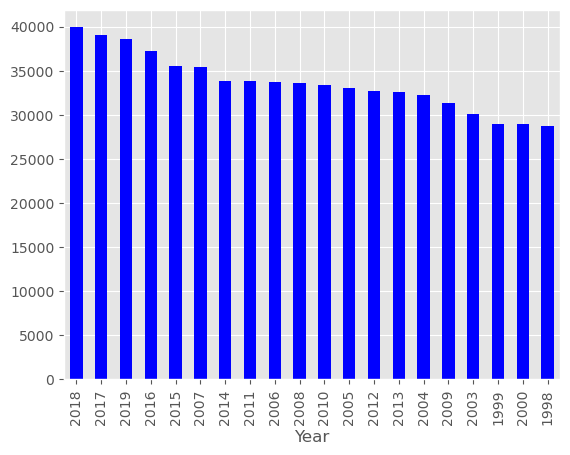

In [113]:
print('Suggested features of first df: ', df0columns)
print('\n')
bar = input('Would you like to plot bar graphs for first df? Y/y or N/n?' )
while bar == 'Y' or bar == 'y': 
    choice = input('What feature should be plotted?')
    dfid = input('And in the first df? Y/y or N/n?')
    if (choice in df0columns) and (dfid == 'Y' or dfid == 'y'):
        print('Plot top 5 chart of first df:')
        print(choice, "Chart")
        ax0 = df0noindex[choice].value_counts().head(20).plot(kind = 'bar', color = 'blue', fontsize = 10)
    else:
        print('Cannot plot the graph')
    
    bar = input('Repeat? Y/y or N/n?' )
    if bar == 'N' or bar == 'n':
        break

Suggested features of last df:  Index(['data_dte', 'Year', 'Month', 'usg_apt_id', 'usg_apt', 'usg_wac',
       'fg_apt_id', 'fg_apt', 'fg_wac', 'airlineid', 'carrier', 'carriergroup',
       'type', 'Scheduled', 'Charter', 'Total'],
      dtype='object')


Plot top 5 chart of last df:
carrier Chart


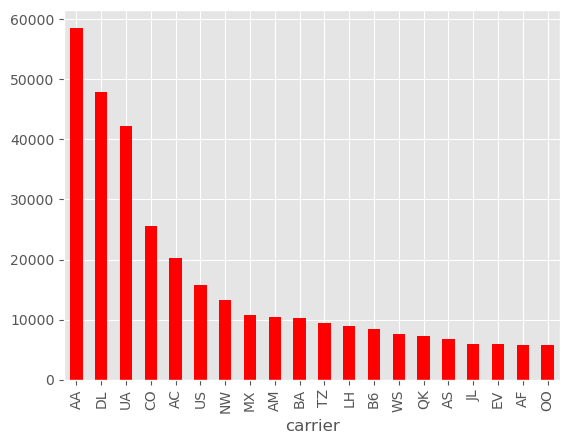

In [114]:
print('Suggested features of last df: ', df_1columns)
print('\n')
bar = input('Would you like to plot bar graphs for last df? Y/y or N/n?' )
while bar == 'Y' or bar == 'y':
    choice = input('What feature should be plotted?')
    dfid = input('And in the last df? Y/y or N/n?')
    if (choice in df_1columns) and (dfid == 'Y' or dfid == 'y'):
        print('Plot top 5 chart of last df:')
        print(choice, "Chart")
        ax_1 = df_1noindex[choice].value_counts().head(20).plot(kind = 'bar', color = 'red', fontsize = 10)
    else:
        print('Cannot plot the graph')
    
    bar = input('Repeat? Y/y or N/n?' )
    if bar == 'N' or bar == 'n':
        break

Suggested features of first df:  Index(['data_dte', 'Year', 'Month', 'usg_apt_id', 'usg_apt', 'usg_wac',
       'fg_apt_id', 'fg_apt', 'fg_wac', 'airlineid', 'carrier', 'carriergroup',
       'type', 'Scheduled', 'Charter', 'Total'],
      dtype='object')


Plot top 5 chart of first df:
Year Chart


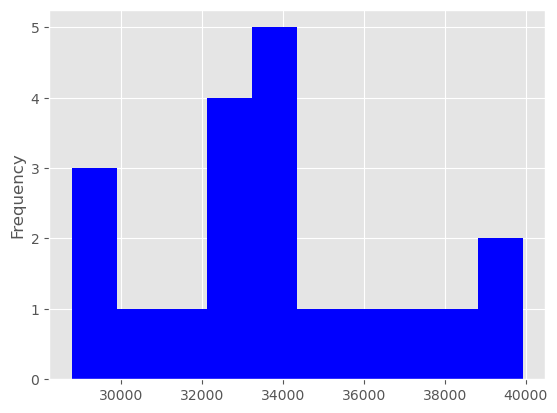

In [115]:
print('Suggested features of first df: ', df0columns)
print('\n')
hist = input('Would you like to plot histographs for first df? Y/y or N/n?' )
while hist == 'Y' or hist == 'y': 
    choice = input('What feature should be plotted?')
    dfid = input('And in the first df? Y/y or N/n?')
    if (choice in df0columns) and (dfid == 'Y' or dfid == 'y'):
        print('Plot top 5 chart of first df:')
        print(choice, "Chart")
        ax0 = df0noindex[choice].value_counts().head(20).plot(kind = 'hist', bins =10, color = 'blue', fontsize = 10)
    else:
        print('Cannot plot the graph')
    
    hist = input('Repeat? Y/y or N/n?' )
    if hist == 'N' or hist == 'n':
        break

Suggested features of last df:  Index(['data_dte', 'Year', 'Month', 'usg_apt_id', 'usg_apt', 'usg_wac',
       'fg_apt_id', 'fg_apt', 'fg_wac', 'airlineid', 'carrier', 'carriergroup',
       'type', 'Scheduled', 'Charter', 'Total'],
      dtype='object')


Plot top 5 chart of last df:
Charter Chart


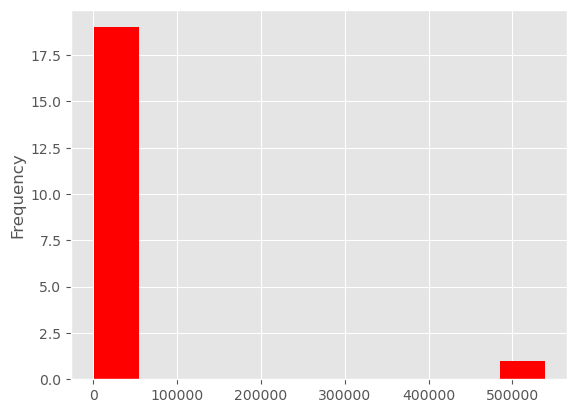

In [116]:
print('Suggested features of last df: ', df_1columns)
print('\n')
hist = input('Would you like to plot histographs for last df? Y/y or N/n?' )
while hist == 'Y' or hist == 'y':
    choice = input('What feature should be plotted?')
    dfid = input('And in the last df? Y/y or N/n?')
    if (choice in df_1columns) and (dfid == 'Y' or dfid == 'y'):
        print('Plot top 5 chart of last df:')
        print(choice, "Chart")
        ax_1 = df_1noindex[choice].value_counts().head(20).plot(kind = 'hist', bins = 10, color = 'red', fontsize = 10)
    else:
        print('Cannot plot the graph')
    
    hist = input('Repeat? Y/y or N/n?' )
    if hist == 'N' or hist == 'n':
        break

Suggested features of first df:  Index(['data_dte', 'Year', 'Month', 'usg_apt_id', 'usg_apt', 'usg_wac',
       'fg_apt_id', 'fg_apt', 'fg_wac', 'airlineid', 'carrier', 'carriergroup',
       'type', 'Scheduled', 'Charter', 'Total'],
      dtype='object')




Plot top 5 chart of first df:
fg_wac Chart


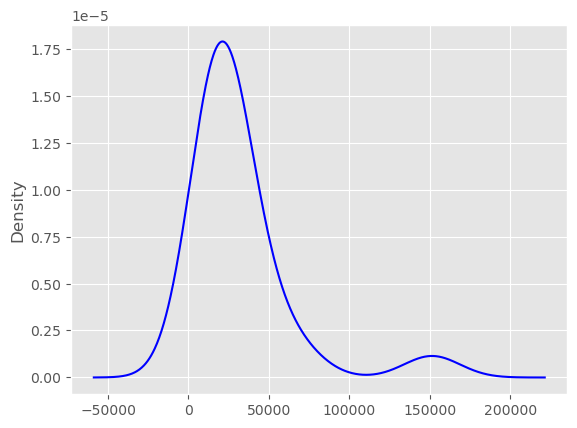

In [118]:
print('Suggested features of first df: ', df0columns)
print('\n')
kde = input('Would you like to plot kde graphs for first df? Y/y or N/n?' )
while kde == 'Y' or kde == 'y': 
    choice = input('What feature should be plotted?')
    dfid = input('And in the first df? Y/y or N/n?')
    if (choice in df0columns) and (dfid == 'Y' or dfid == 'y'):
        print('Plot top 5 chart of first df:')
        print(choice, "Chart")
        ax0 = df0noindex[choice].value_counts().head(20).plot(kind = 'kde', color = 'blue', fontsize = 10)
    else:
        print('Cannot plot the graph')
    
    kde = input('Repeat? Y/y or N/n?' )
    if kde == 'N' or kde == 'n':
        break

Suggested features of last df:  Index(['data_dte', 'Year', 'Month', 'usg_apt_id', 'usg_apt', 'usg_wac',
       'fg_apt_id', 'fg_apt', 'fg_wac', 'airlineid', 'carrier', 'carriergroup',
       'type', 'Scheduled', 'Charter', 'Total'],
      dtype='object')


Plot top 5 chart of last df:
carrier Chart


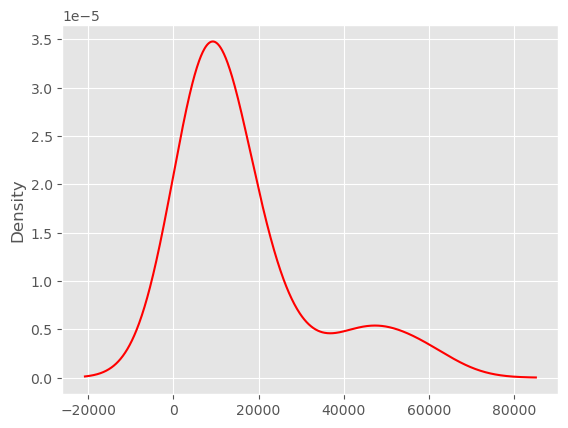

In [119]:
print('Suggested features of last df: ', df_1columns)
print('\n')
kde = input('Would you like to plot kde graphs for last df? Y/y or N/n?' )
while kde == 'Y' or kde == 'y':
    choice = input('What feature should be plotted?')
    dfid = input('And in the last df? Y/y or N/n?')
    if (choice in df_1columns) and (dfid == 'Y' or dfid == 'y'):
        print('Plot top 5 chart of last df:')
        print(choice, "Chart")
        ax_1 = df_1noindex[choice].value_counts().head(20).plot(kind = 'kde', color = 'red', fontsize = 10)
    else:
        print('Cannot plot the graph')
    
    kde = input('Repeat? Y/y or N/n?' )
    if kde == 'N' or kde == 'n':
        break

## Feature Realtionships and Visualisation

Suggested features of first df:  Index(['data_dte', 'Year', 'Month', 'usg_apt_id', 'usg_apt', 'usg_wac',
       'fg_apt_id', 'fg_apt', 'fg_wac', 'airlineid', 'carrier', 'carriergroup',
       'type', 'Scheduled', 'Charter', 'Total'],
      dtype='object')


Plot relation scatter chart of first df:
Month vs fg_wac  Chart


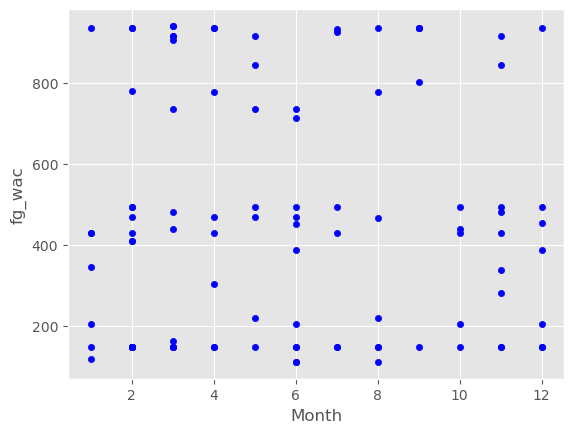

In [126]:
print('Suggested features of first df: ', df0columns)
print('\n')
rel = input('Would you like to plot scatter graphs for first df? Y/y or N/n?' )
while rel == 'Y' or rel == 'y':
    x = input('What feature should be plotted as x-axis?')
    y = input('What feature should be plotted as y-axis?')
    #dfid = input('And in the last df? Y/y or N/n?')
    if (x in df0columns) and (y in df0columns):
        print('Plot relation scatter chart of first df:')
        print(x, 'vs', y, " Chart")
        ax0 = df0noindex.head(100).plot(kind = 'scatter', x = x, y = y, color = 'blue', fontsize = 10)
        plt.show()
    else:
        print('Cannot plot the graph')
    
    rel = input('Repeat? Y/y or N/n?' )
    if rel == 'N' or rel == 'n':
        break

Suggested features of last df:  Index(['data_dte', 'Year', 'Month', 'usg_apt_id', 'usg_apt', 'usg_wac',
       'fg_apt_id', 'fg_apt', 'fg_wac', 'airlineid', 'carrier', 'carriergroup',
       'type', 'Scheduled', 'Charter', 'Total'],
      dtype='object')




Plot relation scatter chart of last df:
Year vs carrier  Chart


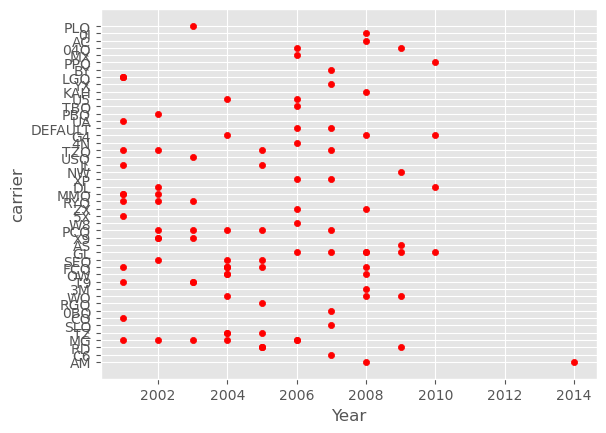

In [124]:
#plot relationship between 2 user defined features
print('Suggested features of last df: ', df_1columns)
print('\n')
rel = input('Would you like to plot scatter graphs for last df? Y/y or N/n?' )
while rel == 'Y' or rel == 'y':
    x = input('What feature should be plotted as x-axis?')
    y = input('What feature should be plotted as y-axis?')
    #dfid = input('And in the last df? Y/y or N/n?')
    if (x in df_1columns) and (y in df_1columns):
        print('Plot relation scatter chart of last df:')
        print(x, 'vs', y, " Chart")
        ax_1 = df_1noindex.head(100).plot(kind = 'scatter', x = x, y = y, color = 'red', fontsize = 10)
        plt.show()
    else:
        print('Cannot plot the graph')
    
    rel = input('Repeat? Y/y or N/n?' )
    if rel == 'N' or rel == 'n':
        break

Suggested features of first df:  Index(['data_dte', 'Year', 'Month', 'usg_apt_id', 'usg_apt', 'usg_wac',
       'fg_apt_id', 'fg_apt', 'fg_wac', 'airlineid', 'carrier', 'carriergroup',
       'type', 'Scheduled', 'Charter', 'Total'],
      dtype='object')


Plot relation scatter chart of first df:
Year vs Scheduled  Chart


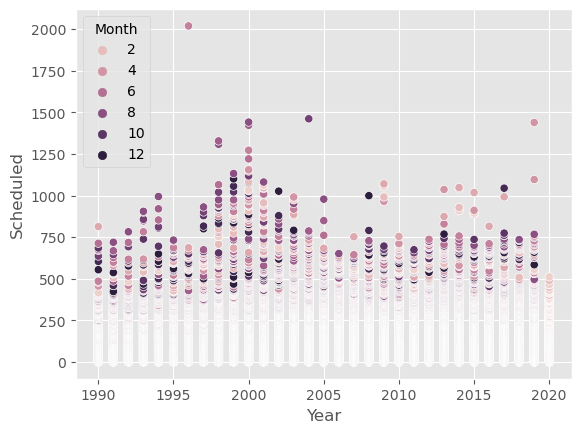

In [130]:
#use sns
print('Suggested features of first df: ', df0columns)
print('\n')
rel = input('Use seaborn to graph scatter plots? Y/y or N/n?' )
while rel == 'Y' or rel == 'y':
    x = input('What feature should be plotted as x-axis?')
    y = input('What feature should be plotted as y-axis?')
    hue = input('What feature is the hue?')
    #dfid = input('And in the last df? Y/y or N/n?')
    if (x in df0columns) and (y in df0columns):
        print('Plot relation scatter chart of first df:')
        print(x, 'vs', y, " Chart")
        ax0 = sns.scatterplot( x = x, y = y, hue = hue, data = df0noindex)
        plt.show()
    else:
        print('Cannot plot the graph')
    
    rel = input('Repeat? Y/y or N/n?' )
    if rel == 'N' or rel == 'n':
        break

Suggested features of last df:  Index(['data_dte', 'Year', 'Month', 'usg_apt_id', 'usg_apt', 'usg_wac',
       'fg_apt_id', 'fg_apt', 'fg_wac', 'airlineid', 'carrier', 'carriergroup',
       'type', 'Scheduled', 'Charter', 'Total'],
      dtype='object')


Plot relation scatter chart of first df:
Charter vs Year  Chart


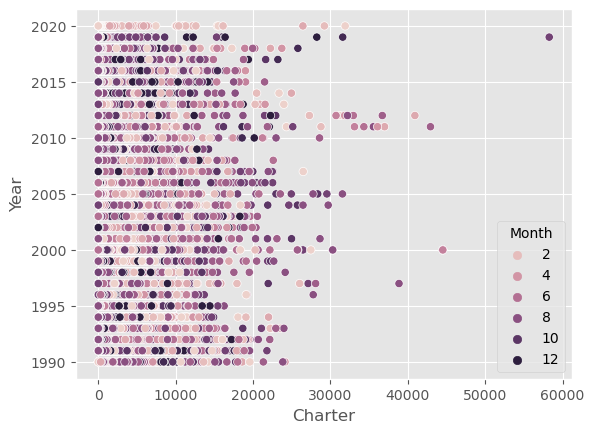

In [131]:
#use sns
print('Suggested features of last df: ', df_1columns)
print('\n')
rel = input('Use seaborn to graph scatter plots? Y/y or N/n?' )
while rel == 'Y' or rel == 'y':
    x = input('What feature should be plotted as x-axis?')
    y = input('What feature should be plotted as y-axis?')
    hue = input('What feature is the hue?')
    #dfid = input('And in the last df? Y/y or N/n?')
    if (x in df_1columns) and (y in df_1columns):
        print('Plot relation scatter chart of last df:')
        print(x, 'vs', y, " Chart")
        ax_1 = sns.scatterplot( x = x, y = y, hue = hue, data = df_1noindex)
        plt.show()
    else:
        print('Cannot plot the graph')
    
    rel = input('Repeat? Y/y or N/n?' )
    if rel == 'N' or rel == 'n':
        break

In [132]:
sns.pairplot(df0noindex, vars = df0numerical)

In [ ]:
sns.pairplot(df0noindex, vars = df0categorical)

In [ ]:
sns.pairplot(df_1noindex, vars = df_1numerical)

In [ ]:
sns.pairplot(df_1noindex, vars = df_1categorical)

In [ ]:
df0corr = df0noindex.dropna().corr()   ##correlation chart of first dataset

: 

In [ ]:
sns.heatmap(df0corr, annot = True)

In [ ]:
df_1corr = df_1noindex.dropna().corr()   ##correlation chart of last dataset

In [ ]:
sns.heatmap(df_1corr, annot = True)